# Sentyment

In [71]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

import numpy as np

import nltk
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [72]:
num_top_words=10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)
max([max(sequence) for sequence in train_data])

9999

In [73]:
def vectorize_sequences(sequences, dimension=num_top_words):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [74]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print('x_train sample:', x_train[0])
print('x_train shape:', x_train.shape)
print('y_train sample:', y_train[0])

x_train sample: [0. 1. 1. ... 0. 0. 0.]
x_train shape: (25000, 10000)
y_train sample: 1.0


In [85]:
model = keras.Sequential([
    layers.Dense(32, activation="leaky_relu"),
    layers.Dense(128, activation="leaky_relu"),
    layers.Dense(128, activation="leaky_relu"),
    layers.Dense(1, activation="sigmoid")])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:num_top_words]
partial_x_train = x_train[num_top_words:]
y_val = y_train[:num_top_words]
partial_y_train = y_train[num_top_words:]

history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_train, y_train)
print(results)

history_dict = history.history
print(history_dict.keys())

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7056 - loss: 0.5557 - val_accuracy: 0.8819 - val_loss: 0.2867
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8979 - loss: 0.2631 - val_accuracy: 0.9399 - val_loss: 0.1705
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9227 - loss: 0.1965 - val_accuracy: 0.9517 - val_loss: 0.1385
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9376 - loss: 0.1610 - val_accuracy: 0.9537 - val_loss: 0.1242
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9525 - loss: 0.1247 - val_accuracy: 0.9618 - val_loss: 0.1032
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9653 - loss: 0.0916 - val_accuracy: 0.9820 - val_loss: 0.0541
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9703 - loss: 0.0787 - val_accuracy: 0.9859 - val_loss: 0.0554
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9797 - loss: 0.0552 - val_accuracy: 0.9893 - val_loss

In [86]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [87]:
review='''
From the creators of Lost...of course I'm gonna watch this! Loving it so far. Some of the actors are so so and annoying but others are intriguing. Love the main actor who was in Lost also.
'''

In [88]:
review='''
Having seen the 1st 3 episodes i can say that I will surely be here for the entire season and beyond if they get another. It's been solid. Good story good characters good monsters. I like the premise. I personally haven't seen much problem with the acting as some people have said. Give it a shot.
'''

In [89]:
#nltk.download('punkt_tab')

In [90]:
review_numers = [word_index.get(word, '?') for word in word_tokenize(review) if word_index.get(word, '?') !='?' and word_index.get(word, '?') < num_top_words]
review_vec = vectorize_sequences([review_numers])
print(review_numers)

[107, 1, 3281, 339, 669, 10, 67, 132, 12, 77, 1345, 27, 130, 15, 1, 433, 808, 2, 721, 45, 33, 76, 157, 3576, 74, 1153, 62, 49, 102, 49, 1936, 37, 1, 860, 1273, 25, 107, 73, 436, 16, 1, 113, 14, 46, 81, 25, 298, 9, 3, 321]


In [91]:
print (f'Sztuczna inteligencja ocenia tę ręcenzję na {int(model.predict(review_vec)[0][0] * 10)}.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Sztuczna inteligencja ocenia tę ręcenzję na 0.


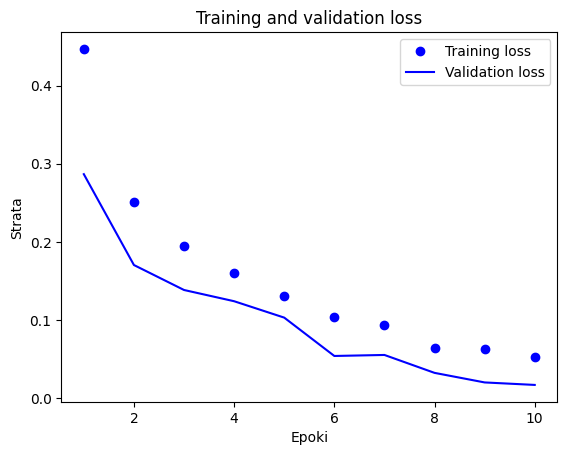

In [92]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epoki")
plt.ylabel("Strata")
plt.legend()
plt.show()

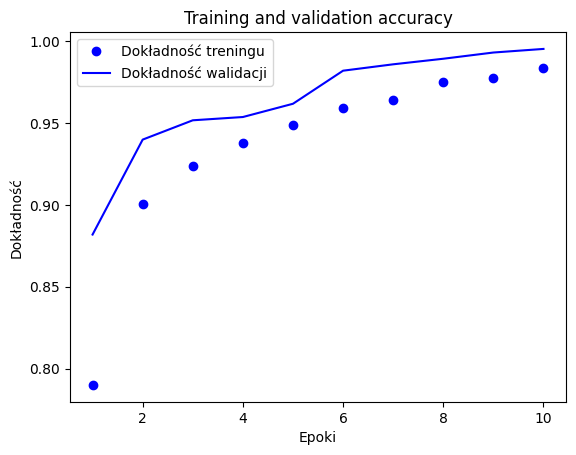

In [93]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Dokładność treningu")
plt.plot(epochs, val_acc, "b", label="Dokładność walidacji")
plt.title("Training and validation accuracy")
plt.xlabel("Epoki")
plt.ylabel("Dokładność")
plt.legend()
plt.show()

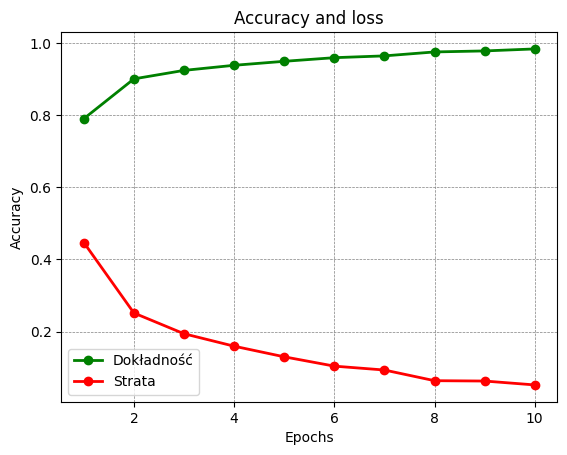

In [94]:
plt.clf()
acc = history.history["accuracy"]
loss = history.history["loss"]
plt.plot(epochs, acc, "o-", label="Dokładność", color="green", linewidth=2)
plt.plot(epochs, loss, "o-", label="Strata", color="red", linewidth=2)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.title("Accuracy and loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()